In [3]:
import pandas as pd

In [4]:
pd.set_option('display.max_columns', None) # To display all columns
pd.set_option('display.max_rows', None) # To display all rows

In [5]:
# Loading the data
train_df = pd.read_csv(r'..\data\raw\train.csv')
val_df = pd.read_csv(r'..\data\raw\val.csv')
test_df = pd.read_csv(r'..\data\raw\test.csv')
usmetros_df = pd.read_csv(r'..\data\raw\usmetros.csv')

In [6]:
# printing shapes of the data
print("Train shape:", train_df.shape)
print("Validation shape:", val_df.shape)
print("US Metros shape:", usmetros_df.shape)

Train shape: (585244, 39)
Validation shape: (149424, 39)
US Metros shape: (387, 11)


In [7]:
train_df.columns

Index(['date', 'median_sale_price', 'median_list_price', 'median_ppsf',
       'median_list_ppsf', 'homes_sold', 'pending_sales', 'new_listings',
       'inventory', 'median_dom', 'avg_sale_to_list', 'sold_above_list',
       'off_market_in_two_weeks', 'city', 'zipcode', 'year', 'bank', 'bus',
       'hospital', 'mall', 'park', 'restaurant', 'school', 'station',
       'supermarket', 'Total Population', 'Median Age', 'Per Capita Income',
       'Total Families Below Poverty', 'Total Housing Units', 'Median Rent',
       'Median Home Value', 'Total Labor Force', 'Unemployed Population',
       'Total School Age Population', 'Total School Enrollment',
       'Median Commute Time', 'price', 'city_full'],
      dtype='object')

In [8]:
print('Unique cities in the training set:')
print(train_df['city_full'].unique())
print(f"Number of unique cities in the training set: {train_df['city_full'].nunique()}")

Unique cities in the training set:
['Atlanta-Sandy Springs-Alpharetta' 'Pittsburgh' 'Boston-Cambridge-Newton'
 'Tampa-St. Petersburg-Clearwater' 'Baltimore-Columbia-Towson'
 'Portland-Vancouver-Hillsboro' 'Philadelphia-Camden-Wilmington'
 'New York-Newark-Jersey City' 'Chicago-Naperville-Elgin'
 'Orlando-Kissimmee-Sanford' 'Seattle-Tacoma-Bellevue'
 'San Francisco-Oakland-Berkeley' 'San Diego-Chula Vista-Carlsbad'
 'Austin-Round Rock-Georgetown' 'St. Louis' 'Sacramento-Roseville-Folsom'
 'Phoenix-Mesa-Chandler' 'Riverside-San Bernardino-Ontario'
 'San Antonio-New Braunfels' 'Detroit-Warren-Dearborn' 'Cincinnati'
 'Houston-The Woodlands-Sugar Land' 'Charlotte-Concord-Gastonia'
 'Denver-Aurora-Lakewood' 'Los Angeles-Long Beach-Anaheim' 'DC_Metro'
 'Dallas-Fort Worth-Arlington' 'Minneapolis-St. Paul-Bloomington'
 'Las Vegas-Henderson-Paradise' 'Miami-Fort Lauderdale-Pompano Beach']
Number of unique cities in the training set: 30


In [9]:
# Displaying first few rows of the usmetros data
usmetros_df[["metro_full", "lat", "lng"]].head()

,metro_full,lat,lng
0,New York-Newark-Jersey City,40.7222,-74.0225
1,Los Angeles-Long Beach-Anaheim,34.2215,-118.1494
2,Chicago-Naperville-Elgin,41.6675,-87.9597
3,Dallas-Fort Worth-Arlington,32.8495,-96.9704
4,Houston-Pasadena-The Woodlands,29.8422,-95.3855


## Coverting the US City Name to Lat Log 

In [10]:
## Train DataSet Name discrepancys with US Metros DataSet
city_mapping = {
    'Las Vegas-Henderson-Paradise': 'Las Vegas-Henderson-North Las Vegas',
    'Denver-Aurora-Lakewood': 'Denver-Aurora-Centennial',
    'Houston-The Woodlands-Sugar Land': 'Houston-Pasadena-The Woodlands',
    'Austin-Round Rock-Georgetown': 'Austin-Round Rock-San Marcos',
    'Miami-Fort Lauderdale-Pompano Beach': 'Miami-Fort Lauderdale-West Palm Beach',
    'San Francisco-Oakland-Berkeley': 'San Francisco-Oakland-Fremont',
    'DC_Metro': 'Washington-Arlington-Alexandria',
    'Atlanta-Sandy Springs-Alpharetta': 'Atlanta-Sandy Springs-Roswell'
}


In [11]:
def map_city_name(df : pd.DataFrame) -> pd.DataFrame:

    ''' This function maps the city names in the input dataframe to match those in the usmetros dataframe.
        It then merges the latitude and longitude information from the usmetros dataframe into the input dataframe.
        Args:
            df (pd.DataFrame): Input dataframe containing a 'city_full' column.
        Returns:
            pd.DataFrame: Dataframe with added 'lat' and 'lng' columns.
    '''
    
    df['city_full'] = df['city_full'].replace(city_mapping)

    df = df.merge(usmetros_df[['metro_full', 'lat', 'lng']], how='left', left_on='city_full', right_on='metro_full')

    df = df.drop(columns=['metro_full'])

    return df

In [12]:
train_df = map_city_name(train_df)
val_df = map_city_name(val_df)
test_df = map_city_name(test_df)

In [13]:
train_df.head(2)

,date,median_sale_price,median_list_price,median_ppsf,median_list_ppsf,homes_sold,pending_sales,new_listings,inventory,median_dom,avg_sale_to_list,sold_above_list,off_market_in_two_weeks,city,zipcode,year,bank,bus,hospital,mall,park,restaurant,school,station,supermarket,Total Population,Median Age,Per Capita Income,Total Families Below Poverty,Total Housing Units,Median Rent,Median Home Value,Total Labor Force,Unemployed Population,Total School Age Population,Total School Enrollment,Median Commute Time,price,city_full,lat,lng
0,2012-03-31,46550.0,217450.0,31.813674,110.183666,14.0,23.0,44.0,64.0,59.5,0.943662,0.142857,0.043478,ATL,30002,2012,12.0,2.0,4.0,1.0,60.0,45.0,57.0,4.0,7.0,5811.0,36.3,33052.0,5811.0,2677.0,710.0,279500.0,3171.0,460.0,5408.0,5408.0,2492.0,200773.999557,Atlanta-Sandy Springs-Roswell,33.7338,-84.3922
1,2012-03-31,200000.0,7500.0,104.931794,79.265873,1.0,1.0,1.0,2.0,290.0,0.909091,0.000000,0.000000,PGH,15469,2012,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,2441.0,41.8,20241.0,2385.0,1108.0,641.0,94600.0,1171.0,52.0,2376.0,2376.0,1018.0,105863.681174,Pittsburgh,40.4744,-79.8632


In [14]:
val_df.head(2)

,date,median_sale_price,median_list_price,median_ppsf,median_list_ppsf,homes_sold,pending_sales,new_listings,inventory,median_dom,avg_sale_to_list,sold_above_list,off_market_in_two_weeks,city,zipcode,year,bank,bus,hospital,mall,park,restaurant,school,station,supermarket,Total Population,Median Age,Per Capita Income,Total Families Below Poverty,Total Housing Units,Median Rent,Median Home Value,Total Labor Force,Unemployed Population,Total School Age Population,Total School Enrollment,Median Commute Time,price,city_full,lat,lng
0,2020-01-31,184000.0,168450.0,123.333333,109.899800,35.0,30.0,34.0,37.0,50.0,0.954732,0.171429,0.300000,CHI,60482,2020,3.0,0.0,2.0,0.0,68.0,30.0,60.0,5.0,14.0,10849.0,42.1,27037.0,10795.0,4598.0,964.0,169000.0,5690.0,414.0,10573.0,10573.0,5089.0,164839.734849,Chicago-Naperville-Elgin,41.6675,-87.9597
1,2020-01-31,140000.0,139000.0,94.691957,111.311054,61.0,81.0,83.0,54.0,10.0,0.963039,0.098361,0.469136,CIN,41071,2020,35.0,5.0,4.0,3.0,139.0,259.0,86.0,1.0,8.0,20624.0,36.6,30324.0,19423.0,10164.0,802.0,132400.0,10479.0,552.0,19809.0,19809.0,9383.0,132164.314962,Cincinnati,39.0811,-84.4646


In [15]:
# shape of the final datasets
print("Train shape after mapping:", train_df.shape)
print("Validation shape after mapping:", val_df.shape)

Train shape after mapping: (585244, 41)
Validation shape after mapping: (149424, 41)


## Clean Duplicates

In [16]:
print(" Number Of Rows :", train_df.shape[0])
print(" Number Of Duplicates Rows :", train_df.duplicated().sum())
print(" Number Of Duplicate Row Excluding The Year And Date Columns :",
       train_df.drop(columns=['year', 'date']).duplicated().sum())

 Number Of Rows : 585244
 Number Of Duplicates Rows : 0
 Number Of Duplicate Row Excluding The Year And Date Columns : 6321


In [17]:
train_df = train_df.drop_duplicates(subset=train_df.columns.difference(['year', 'date']),keep = 'first')
print(" Number Of Rows After Cleaning Duplicates:", train_df.shape[0])
print(" Number Of Duplicates Rows After Cleaning Duplicates:", train_df.duplicated().sum())
print(" Number Of Duplicate Row Excluding The Year And Date Columns After Cleaning Duplicates:",
       train_df.drop(columns=['year', 'date']).duplicated().sum())

 Number Of Rows After Cleaning Duplicates: 578923
 Number Of Duplicates Rows After Cleaning Duplicates: 0
 Number Of Duplicate Row Excluding The Year And Date Columns After Cleaning Duplicates: 0


In [18]:
print(" Number Of Rows :", val_df.shape[0])
print(" Number Of Duplicates Rows :", val_df.duplicated().sum())
print(" Number Of Duplicate Row Excluding The Year And Date Columns :",
       val_df.drop(columns=['year', 'date']).duplicated().sum())


 Number Of Rows : 149424
 Number Of Duplicates Rows : 0
 Number Of Duplicate Row Excluding The Year And Date Columns : 726


In [19]:
val_df = val_df.drop_duplicates(subset=val_df.columns.difference(['year', 'date']),keep = 'first')
print(" Number Of Rows After Cleaning Duplicates:", val_df.shape[0])
print(" Number Of Duplicates Rows After Cleaning Duplicates:", val_df.duplicated().sum())
print(" Number Of Duplicate Row Excluding The Year And Date Columns After Cleaning Duplicates:",
       val_df.drop(columns=['year', 'date']).duplicated().sum())

 Number Of Rows After Cleaning Duplicates: 148698
 Number Of Duplicates Rows After Cleaning Duplicates: 0
 Number Of Duplicate Row Excluding The Year And Date Columns After Cleaning Duplicates: 0


## Clean Outliers

In [20]:
train_df['median_list_price'].describe()

count    5.789230e+05
mean     3.729765e+05
std      2.314906e+06
min      0.000000e+00
25%      1.720000e+05
50%      2.750000e+05
75%      4.390000e+05
max      1.000000e+09
Name: median_list_price, dtype: float64

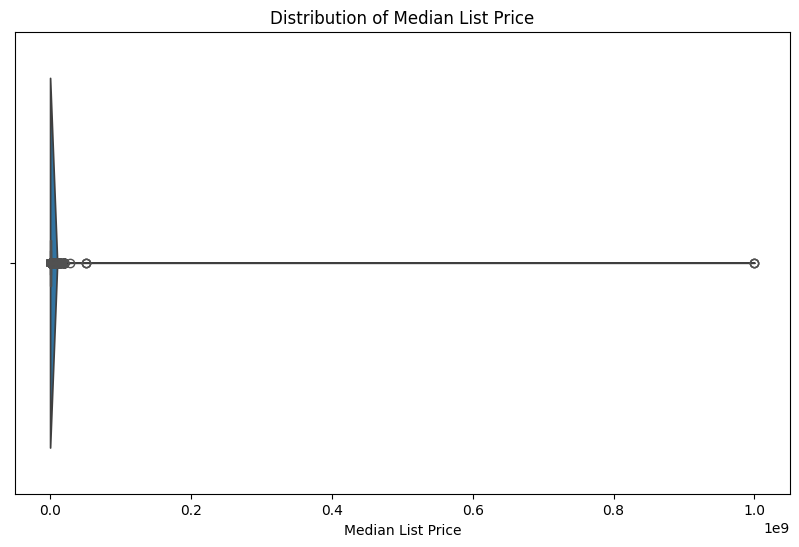

In [21]:
# Plotting violin plot to visualize the distribution of median_list_price
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.violinplot(x=train_df['median_list_price']) 
sns.boxplot(x=train_df['median_list_price'], whis=1.5, width=0.1, boxprops={'zorder': 2, 'facecolor': 'lightgrey'})
plt.title('Distribution of Median List Price')
plt.xlabel('Median List Price')
plt.show()


In [22]:
# find 99th percentile cutoff
q99 = train_df['median_list_price'].quantile(0.9999)
print(f"99th percentile cutoff for median_list_price: {q99}")

# filter rows above or equal to that cutoff
top_1_percent_rows = train_df[train_df['median_list_price'] >= q99]

# show summary
print("Number of rows in top 1%:", top_1_percent_rows.shape[0])

# display top 20 most expensive
top_1_percent_rows.sort_values(by="median_list_price", ascending=False).head(20)


99th percentile cutoff for median_list_price: 12500000.0
Number of rows in top 1%: 59


,date,median_sale_price,median_list_price,median_ppsf,median_list_ppsf,homes_sold,pending_sales,new_listings,inventory,median_dom,avg_sale_to_list,sold_above_list,off_market_in_two_weeks,city,zipcode,year,bank,bus,hospital,mall,park,restaurant,school,station,supermarket,Total Population,Median Age,Per Capita Income,Total Families Below Poverty,Total Housing Units,Median Rent,Median Home Value,Total Labor Force,Unemployed Population,Total School Age Population,Total School Enrollment,Median Commute Time,price,city_full,lat,lng
275824,2015-11-30,425000.0,999999999.0,220.055710,236.634569,241.0,284.0,616.0,196.0,47.0,0.979123,0.132780,0.133803,DC,20878,2015,9.0,0.0,4.0,1.0,110.0,59.0,50.0,2.0,11.0,63855.0,38.1,52955.0,63757.0,23514.0,1677.0,535500.0,36595.0,1960.0,61237.0,61237.0,32125.0,5.148844e+05,Washington-Arlington-Alexandria,38.8446,-77.5092
283729,2015-12-31,439444.0,999999999.0,217.479377,231.798505,254.0,255.0,536.0,136.0,53.0,0.976354,0.137795,0.109804,DC,20878,2015,9.0,0.0,4.0,1.0,110.0,59.0,50.0,2.0,11.0,63855.0,38.1,52955.0,63757.0,23514.0,1677.0,535500.0,36595.0,1960.0,61237.0,61237.0,32125.0,5.152060e+05,Washington-Arlington-Alexandria,38.8446,-77.5092
271684,2015-10-31,439000.0,999999999.0,218.867925,236.391156,243.0,269.0,671.0,259.0,46.0,0.980975,0.160494,0.130112,DC,20878,2015,9.0,0.0,4.0,1.0,110.0,59.0,50.0,2.0,11.0,63855.0,38.1,52955.0,63757.0,23514.0,1677.0,535500.0,36595.0,1960.0,61237.0,61237.0,32125.0,5.143890e+05,Washington-Arlington-Alexandria,38.8446,-77.5092
312332,2016-05-31,270000.0,50449949.5,232.758621,4156.568441,1.0,1.0,2.0,2.0,264.0,1.000000,0.000000,0.000000,DC,20838,2016,0.0,0.0,0.0,0.0,11.0,1.0,4.0,2.0,0.0,247.0,49.6,61165.0,243.0,93.0,1507.0,607100.0,135.0,0.0,239.0,239.0,122.0,6.739973e+05,Washington-Arlington-Alexandria,38.8446,-77.5092
323492,2016-06-30,415000.0,50449949.5,257.508343,4156.568441,2.0,2.0,2.0,2.0,324.5,1.000447,0.500000,0.000000,DC,20838,2016,0.0,0.0,0.0,0.0,11.0,1.0,4.0,2.0,0.0,247.0,49.6,61165.0,243.0,93.0,1507.0,607100.0,135.0,0.0,239.0,239.0,122.0,6.739973e+05,Washington-Arlington-Alexandria,38.8446,-77.5092
328853,2016-07-31,270000.0,50449949.5,232.758621,4156.568441,3.0,3.0,2.0,2.0,264.0,0.973591,0.333333,0.000000,DC,20838,2016,0.0,0.0,0.0,0.0,11.0,1.0,4.0,2.0,0.0,247.0,49.6,61165.0,243.0,93.0,1507.0,607100.0,135.0,0.0,239.0,239.0,122.0,6.739973e+05,Washington-Arlington-Alexandria,38.8446,-77.5092
284664,2015-12-31,830000.0,27800000.0,459.833795,3677.735150,3.0,3.0,1.0,22.0,235.0,0.842625,0.000000,0.000000,NY,7620,2015,10.0,0.0,10.0,0.0,46.0,18.0,69.0,3.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.366853e+06,New York-Newark-Jersey City,40.7222,-74.0225
418488,2017-10-31,4050000.0,19990000.0,613.636364,2815.492958,2.0,2.0,1.0,4.0,183.0,0.942957,0.000000,0.000000,NY,11962,2017,0.0,0.0,0.0,0.0,2.0,0.0,4.0,1.0,0.0,491.0,49.0,85549.0,491.0,857.0,1484.0,2000001.0,177.0,0.0,482.0,482.0,137.0,3.588981e+06,New York-Newark-Jersey City,40.7222,-74.0225
527887,2019-03-31,4050000.0,19990000.0,613.636364,2815.492958,2.0,2.0,1.0,4.0,183.0,0.942957,0.000000,0.000000,NY,11962,2019,1.0,0.0,0.0,0.0,3.0,0.0,4.0,1.0,0.0,309.0,63.9,96793.0,309.0,907.0,1618.0,2000001.0,108.0,0.0,301.0,301.0,61.0,3.712370e+06,New York-Newark-Jersey City,40.7222,-74.0225
412165,2017-09-30,4050000.0,19990000.0,613.636364,2815.492958,2.0,2.0,1.0,4.0,183.0,0.942957,0.000000,0.000000,NY,11962,2017,0.0,0.0,0.0,0.0,2.0,0.0,4.0,1.0,0.0,491.0,49.0,85549.0,491.0,857.0,1484.0,2000001.0,177.0,0.0,482.0,482.0,137.0,3.595816e+06,New York-Newark-Jersey City,40.7222,-74.0225


In [23]:
val_df['median_list_price'].describe()

count    1.486980e+05
mean     4.804766e+05
std      4.785498e+05
min      0.000000e+00
25%      2.500000e+05
50%      3.750000e+05
75%      5.720000e+05
max      5.033495e+07
Name: median_list_price, dtype: float64

* removing outliers from dataset as price above 19M are not realistic for most of the cities and are likely data errors

In [24]:
# Clean outliers above 19M in both train and val
train_df = train_df[train_df['median_list_price'] <= 19_000_000].copy()
val_df = val_df[val_df['median_list_price'] <= 19_000_000].copy()

In [25]:
# saving cleaned data
train_df.to_csv(r'..\data\processed\train_cleaned.csv', index=False)
val_df.to_csv(r'..\data\processed\val_cleaned.csv', index=False)
test_df.to_csv(r'..\data\processed\test_cleaned.csv', index=False)

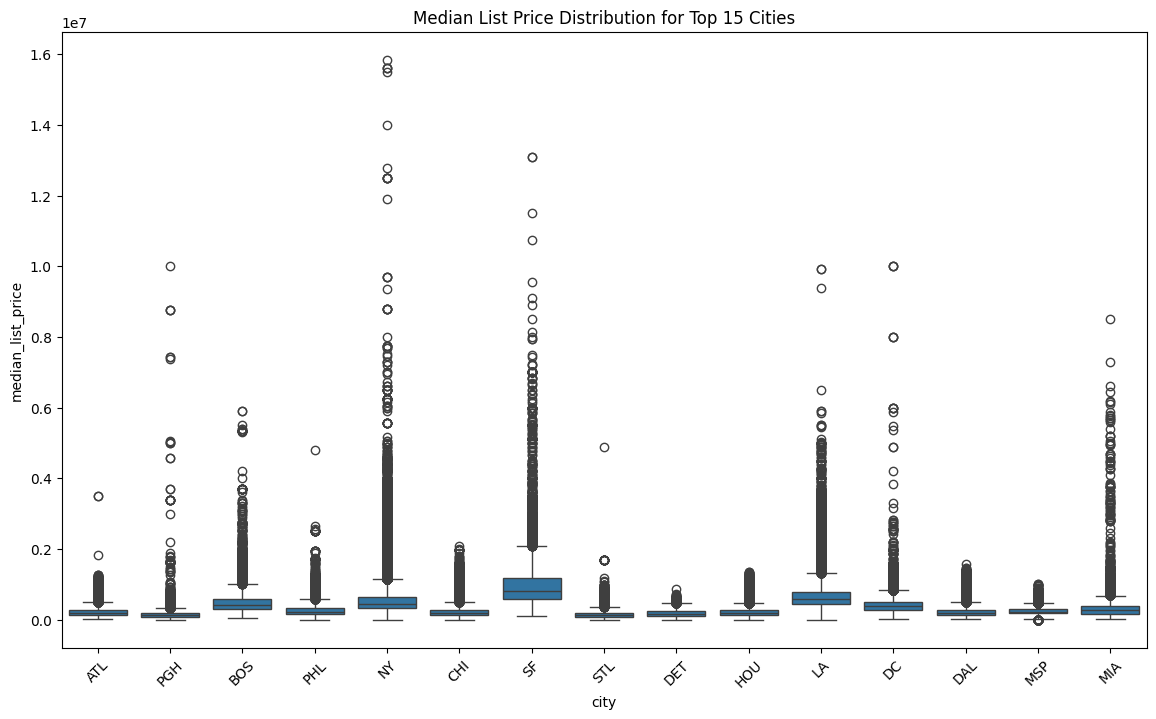

In [26]:
# Get the top 15 cities by count
top_15_cities = train_df['city'].value_counts().nlargest(15).index

# Filter data for only those cities
train_top_cities = train_df[train_df['city'].isin(top_15_cities)]

# Plot
plt.figure(figsize=(14, 8))
sns.boxplot(x="city", y="median_list_price", data=train_top_cities)
plt.xticks(rotation=45)
plt.title("Median List Price Distribution for Top 15 Cities")
plt.show()